In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"4d4759066dca189587bcac8981b34740"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d leangab/poe-short-stories-corpuscsv

Dataset URL: https://www.kaggle.com/datasets/leangab/poe-short-stories-corpuscsv
License(s): other


In [ ]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2025-05-02 08:31:56--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-05-02 08:31:56 (15.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data

In [ ]:
unzip_data('/content/poe-short-stories-corpuscsv.zip')

In [ ]:
df = pd.read_csv('/content/preprocessed_data.csv')
df

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835
...,...,...,...,...,...,...,...,...
65,THE BALLOON-HOAX,"[Astounding News by Express, via Norfolk!—The ...",?,"April 13, 1844",?,"Fiction,Hoax",?,April 1844
66,THE MYSTERY OF MARIE ROGET,A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.” ...,?,November 1842,?,Detective_fiction,?,November 1842
67,THE POETIC PRINCIPLE,"IN speaking of the Poetic Principle, I have no...",?,"August 17, 1849",?,Essay,?,August 1849
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,"BY late accounts from Rotterdam, that city see...",?,June 1835,?,"Hoax,Science_fiction",?,June 1835


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               70 non-null     object
 1   text                70 non-null     object
 2   wikipedia_title     70 non-null     object
 3   publication_date    70 non-null     object
 4   first_published_in  70 non-null     object
 5   classification      70 non-null     object
 6   notes               70 non-null     object
 7   normalized_date     70 non-null     object
dtypes: object(8)
memory usage: 4.5+ KB


In [ ]:
import nltk
from nltk.util import bigrams
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
all_text = " ".join(df['text'].dropna().tolist())
tokens = word_tokenize(all_text.lower())

In [ ]:
bigrams_list = list(bigrams(tokens))

bigram_freq = FreqDist(bigrams_list)

print(bigram_freq.most_common(10))

[(('of', 'the'), 4690), ((',', 'and'), 4473), (('in', 'the'), 1998), (('.', 'the'), 1383), (('to', 'the'), 1274), ((',', 'i'), 1173), ((',', 'in'), 1165), (('.', 'i'), 1153), ((',', 'the'), 1112), (('of', 'a'), 846)]


In [ ]:
cfd = ConditionalFreqDist(bigrams_list)
print(cfd['the'].most_common(5))

[('most', 324), ('whole', 221), ('“', 196), ('same', 180), ('first', 167)]


<Axes: title={'center': 'En cox islenen 20 bigram'}, xlabel='Samples', ylabel='Counts'>

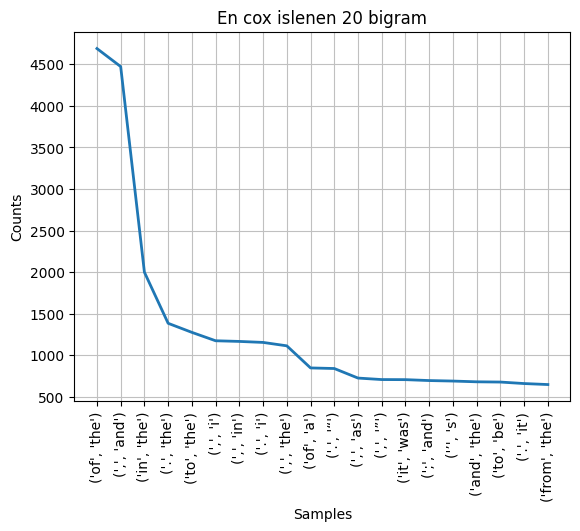

In [ ]:
bigram_freq.plot(20, title = 'En cox islenen 20 bigram')